# CSC 3310 
## Lab 04: Selection Problem
### Vlad Wilson and Leena Afifi
#### Dr. Sebastion Berisha

## Imports

In [8]:
import random, time, statistics, math, textwrap, json, os, sys
from typing import List, Tuple
import pandas as pd
import matplotlib.pyplot as plt

## Implementation

In [4]:

def quickselect(arr: List[int], k: int) -> int:
    """
    Returns the k-th smallest element of arr (1-indexed), using randomized Quickselect.
    Handles duplicates correctly.
    Average time: Θ(n). Worst case: Θ(n^2) (rare with random pivot).
    """
    if not 1 <= k <= len(arr):
        raise ValueError("k out of bounds (must be 1..len(arr))")

    A = list(arr)

    while True:
        if len(A) == 1:
            return A[0]

        pivot = random.choice(A)

        # 3-way partition to handle duplicates properly
        lows  = [x for x in A if x < pivot]
        pivots= [x for x in A if x == pivot]
        highs = [x for x in A if x > pivot]

        n_low, n_piv = len(lows), len(pivots)

        if k <= n_low:
            A = lows
        elif k <= n_low + n_piv:
            return pivot
        else:
            k = k - (n_low + n_piv)
            A = highs


## Sorting based Algorithm

In [5]:
def kth_by_sort(arr: List[int], k: int) -> int:
    return sorted(arr)[k-1]

## Run Tests and Record Results

In [10]:
tests: List[Tuple[List[int], int]] = [
    ([5, 1, 6, 7, 3, 4, 8], 3),
    ([3, 3, 3, 3], 2),
    ([9, 8, 7, 6, 5, 4, 3, 2, 1], 1),
    ([9, 8, 7, 6, 5, 4, 3, 2, 1], 9),
    ([2, 1], 2),
    ([10, -1, 4, 4, 7, 7, 0, 2], 5),
    (list(range(100, 0, -1)), 42),
    ([5], 1),
]

rows = []
for arr, k in tests:
    expected = kth_by_sort(arr, k)
    actual = quickselect(arr, k)
    rows.append({
        "Input": str(arr),
        "k": k,
        "Expected (sorted)[k-1]": expected,
        "Quickselect result": actual,
        "Pass?": expected == actual
    })

df_tests = pd.DataFrame(rows)
print("Quickselect – Test Cases")
df_tests

Quickselect – Test Cases


,Input,k,Expected (sorted)[k-1],Quickselect result,Pass?
0,"[5, 1, 6, 7, 3, 4, 8]",3,4,4,True
1,"[3, 3, 3, 3]",2,3,3,True
2,"[9, 8, 7, 6, 5, 4, 3, 2, 1]",1,1,1,True
3,"[9, 8, 7, 6, 5, 4, 3, 2, 1]",9,9,9,True
4,"[2, 1]",2,2,2,True
5,"[10, -1, 4, 4, 7, 7, 0, 2]",5,4,4,True
6,"[100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, ...",42,42,42,True
7,[5],1,5,5,True


## Benchmarks

In [16]:
def benchmark_once(n: int, trials: int = 5, seed: int = 123) -> dict:
    rng = random.Random(seed)
    ks = [rng.randint(1, n) for _ in range(trials)]
    arrays = [[rng.randint(-10**9, 10**9) for _ in range(n)] for _ in range(trials)]

    # Quickselect timings
    times_qs = []
    for i in range(trials):
        arr = arrays[i][:]  # copy
        k = ks[i]
        t0 = time.perf_counter()
        quickselect(arr, k)
        t1 = time.perf_counter()
        times_qs.append((t1 - t0) * 1000.0)  # ms

    # Sorting-based timings
    times_sort = []
    for i in range(trials):
        arr = arrays[i][:]
        k = ks[i]
        t0 = time.perf_counter()
        kth_by_sort(arr, k)
        t1 = time.perf_counter()
        times_sort.append((t1 - t0) * 1000.0)  # ms

    return {
        "n": n,
        "Quickselect ms (mean)": statistics.mean(times_qs),
        "Quickselect ms (stdev)": statistics.pstdev(times_qs),
        "Sort+index ms (mean)": statistics.mean(times_sort),
        "Sort+index ms (stdev)": statistics.pstdev(times_sort),
        "trials": trials
    }

sizes = [1000, 5000, 10000, 20000, 40000]
bench_rows = [benchmark_once(n, trials=7, seed=321+n) for n in sizes]
df_bench = pd.DataFrame(bench_rows)
df_bench.head()

,n,Quickselect ms (mean),Quickselect ms (stdev),Sort+index ms (mean),Sort+index ms (stdev),trials
0,1000,0.127471,0.032260,0.055557,0.002057,7
1,5000,0.715757,0.133808,0.342700,0.015425,7
2,10000,1.311114,0.295559,0.736443,0.011919,7
3,20000,2.581814,0.856684,1.602286,0.019544,7
4,40000,3.964657,0.810938,3.531743,0.117175,7


## Plot Results

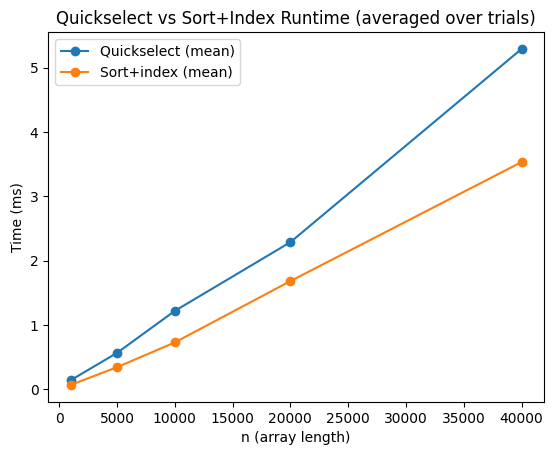

In [15]:
plt.figure()
plt.plot(df_bench["n"], df_bench["Quickselect ms (mean)"], marker="o", label="Quickselect (mean)")
plt.plot(df_bench["n"], df_bench["Sort+index ms (mean)"], marker="o", label="Sort+index (mean)")
plt.xlabel("n (array length)")
plt.ylabel("Time (ms)")
plt.title("Quickselect vs Sort+Index Runtime (averaged over trials)")
plt.legend()
plt.show()